In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import scipy
import pycountry_convert as pc
import folium
import json
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Creating path
path = r'/Users/cameronpaschall/Desktop/Project 6 - Covid'

In [4]:
# Import covid prepared data set
df_cov = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid Wrangled.csv'), index_col = False)

In [5]:
# Import covid continent prepared data set
df_cov_cont = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid Final.csv'), index_col = False)

In [6]:
## Drop Unnamed Column
df_cov = df_cov.drop(columns = ['Unnamed: 0'])

In [7]:
## Drop Unnamed Column
df_cov_cont = df_cov_cont.drop(columns = ['Unnamed: 0'])

In [8]:
df_cov.head()

,Code,Country,Date,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [9]:
df_cov_cont.head()

,Code,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa


In [10]:
df_cov_cont.dtypes

Code                 object
Country              object
Population            int64
Total_Cases         float64
Total_Deaths        float64
Human_Dev_Index     float64
Gdp_Per_Capita      float64
Stringency_Index    float64
Continent            object
dtype: object

# Elbow Technique

In [11]:
obj_df = df_cov_cont.select_dtypes(include=['object']).copy()
obj_df.head()

,Code,Country,Continent
0,AFG,Afghanistan,Asia
1,ALB,Albania,Europe
2,DZA,Algeria,Africa
3,AND,Andorra,Europe
4,AGO,Angola,Africa


In [12]:
obj_df["Country"] = obj_df["Country"].astype('category')
obj_df.dtypes

Code           object
Country      category
Continent      object
dtype: object

In [13]:
## Creating country category column

obj_df["country_cat"] = obj_df["Country"].cat.codes
obj_df.head()

,Code,Country,Continent,country_cat
0,AFG,Afghanistan,Asia,0
1,ALB,Albania,Europe,1
2,DZA,Algeria,Africa,2
3,AND,Andorra,Europe,3
4,AGO,Angola,Africa,4


In [14]:
obj_df["Continent"] = obj_df["Continent"].astype('category')
obj_df.dtypes

Code             object
Country        category
Continent      category
country_cat       int16
dtype: object

In [15]:
## Creating continent category column

obj_df["continent_cat"] = obj_df["Continent"].cat.codes
obj_df.head()

,Code,Country,Continent,country_cat,continent_cat
0,AFG,Afghanistan,Asia,0,1
1,ALB,Albania,Europe,1,2
2,DZA,Algeria,Africa,2,0
3,AND,Andorra,Europe,3,2
4,AGO,Angola,Africa,4,0


In [21]:
df_cov_cont.head()

,Code,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa


In [24]:
## Adding country_cat column to the original DF

extracted_col1 = obj_df["country_cat"]
print("column to added from first dataframe to second:")
display(extracted_col1)
  
df_cov_cont.insert(1, "country_cat", extracted_col1)
print("Second dataframe after adding column from first dataframe:")
display(df_cov_cont)

column to added from first dataframe to second:


0        0
1        1
2        2
3        3
4        4
      ... 
204    204
205    205
206    206
207    207
208    208
Name: country_cat, Length: 209, dtype: int16

Second dataframe after adding column from first dataframe:


,Code,country_cat,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,0,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,1,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,2,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,3,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,4,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa
...,...,...,...,...,...,...,...,...,...,...
204,VEN,204,Venezuela,28435943,4839834.0,40840.0,0.57,12473.33,61.12,South America
205,VNM,205,Vietnam,97338583,122618.0,2318.0,0.69,6171.88,56.42,Asia
206,YEM,206,Yemen,29825968,228925.0,64304.0,0.30,971.00,27.80,Asia
207,ZMB,207,Zambia,18383956,1129913.0,26475.0,0.43,2697.92,33.29,Africa


In [26]:
## Adding continent_cat column to the original DF

extracted_col2 = obj_df["continent_cat"]
print("column to added from first dataframe to second:")
display(extracted_col2)
  
df_cov_cont.insert(1, "continent_cat", extracted_col2)
print("Second dataframe after adding column from first dataframe:")
display(df_cov_cont)

column to added from first dataframe to second:


0      1
1      2
2      0
3      2
4      0
      ..
204    5
205    1
206    1
207    0
208    0
Name: continent_cat, Length: 209, dtype: int8

Second dataframe after adding column from first dataframe:


,Code,continent_cat,country_cat,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,1,0,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,2,1,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,0,2,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,2,3,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,0,4,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa
...,...,...,...,...,...,...,...,...,...,...,...
204,VEN,5,204,Venezuela,28435943,4839834.0,40840.0,0.57,12473.33,61.12,South America
205,VNM,1,205,Vietnam,97338583,122618.0,2318.0,0.69,6171.88,56.42,Asia
206,YEM,1,206,Yemen,29825968,228925.0,64304.0,0.30,971.00,27.80,Asia
207,ZMB,0,207,Zambia,18383956,1129913.0,26475.0,0.43,2697.92,33.29,Africa


In [29]:
df_cov_cont.dtypes

Code                 object
continent_cat          int8
country_cat           int16
Country              object
Population            int64
Total_Cases         float64
Total_Deaths        float64
Human_Dev_Index     float64
Gdp_Per_Capita      float64
Stringency_Index    float64
Continent            object
dtype: object

In [32]:
## removing object columns from DF

df_final = df_cov_cont.drop(['Code', 'Country','Continent'], axis=1)

In [35]:
df_final.dtypes

continent_cat          int8
country_cat           int16
Population            int64
Total_Cases         float64
Total_Deaths        float64
Human_Dev_Index     float64
Gdp_Per_Capita      float64
Stringency_Index    float64
dtype: object

In [30]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
score = [kmeans[i].fit(df_final).score(df_final) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5.17372404847059e+18,
 -1.2889460688339364e+18,
 -5.01403249157028e+17,
 -2.7739530215184243e+17,
 -2.0106503060112627e+17,
 -1.4074275123001816e+17,
 -8.235558280149685e+16,
 -6.023634227093591e+16,
 -4.238848195254551e+16]

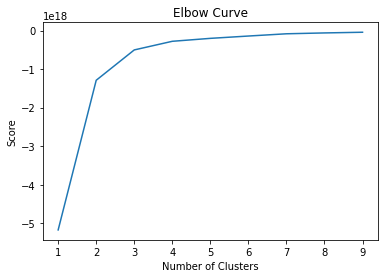

In [34]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The optimal number of clusters is 3 because the curve starts to flatten out at the 3 mark.

## K-Means Clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df_final)

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [40]:
df_final['clusters'] = kmeans.fit_predict(df_final)

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [41]:
df_final['clusters'].value_counts()

0    205
1      2
2      2
Name: clusters, dtype: int64

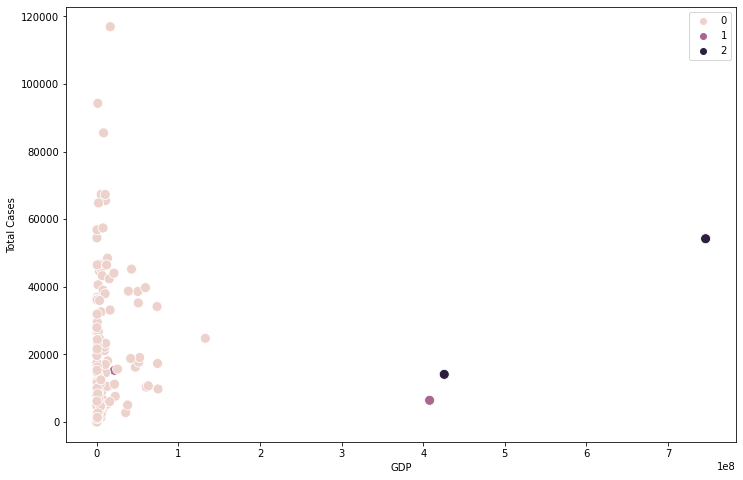

In [45]:
# Plot the clusters for the "Total cases" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_final['Total_Cases'], y=df_final['Gdp_Per_Capita'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Total Cases') # Label y-axis.
plt.show()

## These clusters seem to make sense, as the GDP rises, the colors change to refelct the number of cases versus GDP.

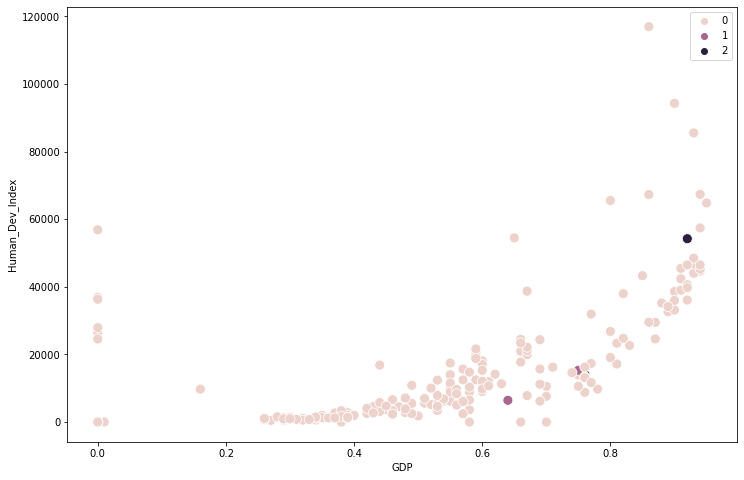

In [49]:
# Plot the clusters for the "Human_Dev_Index" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_final['Human_Dev_Index'], y=df_final['Gdp_Per_Capita'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Human_Dev_Index') # Label y-axis.
plt.show()

## The graph appears to show the correct plotting of the scale of GDP to Human Dev Index, but the sections of clusters could be changed to show a more equal distribution

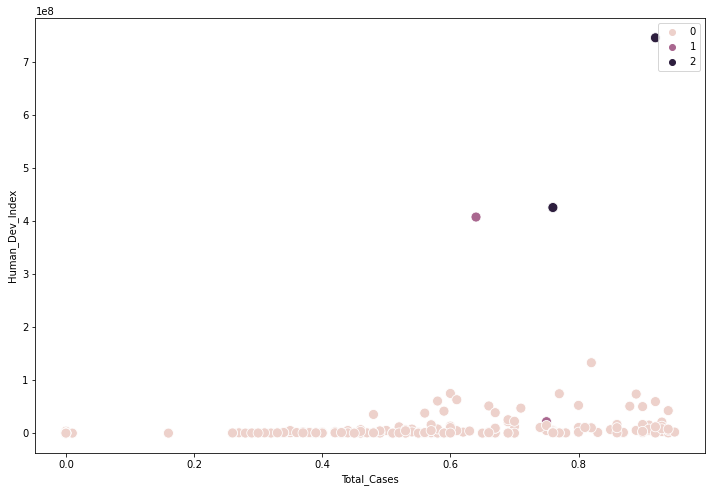

In [52]:
# Plot the clusters for the "Human_Dev_Index" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_final['Human_Dev_Index'], y=df_final['Total_Cases'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total_Cases') # Label x-axis.
plt.ylabel('Human_Dev_Index') # Label y-axis.
plt.show()

## Again, we have 3 clusters but the distribution seems imbalanced. We are still able to see the difference between the 3 categories though

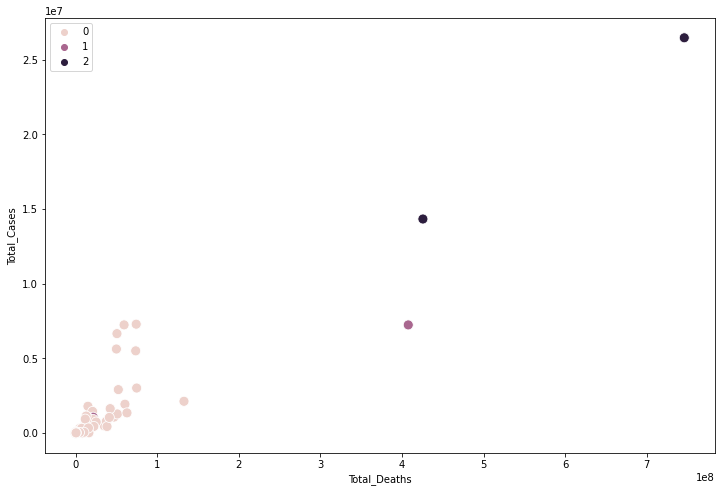

In [53]:
# Plot the clusters for the "Total_Deaths" and "Total_Cases" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_final['Total_Cases'], y=df_final['Total_Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total_Deaths') # Label x-axis.
plt.ylabel('Total_Cases') # Label y-axis.
plt.show()

## This scatterplot makes the most sense and as you can see the more total cases, the more deaths.

# Descriptive Stats

In [47]:
df_final.dtypes

continent_cat          int8
country_cat           int16
Population            int64
Total_Cases         float64
Total_Deaths        float64
Human_Dev_Index     float64
Gdp_Per_Capita      float64
Stringency_Index    float64
clusters              int32
dtype: object

In [48]:
df_final.groupby('clusters').agg({'Total_Cases':['mean', 'median'], 
                         'Gdp_Per_Capita':['mean', 'median'], 
                         'Total_Deaths':['mean', 'median'],
                          'Human_Dev_Index':['mean', 'median'],
                                'Population':['mean', 'median']})

Total_Cases              Gdp_Per_Capita            Total_Deaths  \
                  mean       median           mean    median          mean   
clusters                                                                     
0         7.469719e+06     681299.0   14967.431317   7881.17  3.301031e+05   
1         2.147020e+08  214701967.0   10867.690000  10867.69  4.157133e+06   
2         5.858593e+08  585859307.5   34164.450000  34164.45  2.040907e+07   

                     Human_Dev_Index           Population                
              median            mean median          mean        median  
clusters                                                                 
0            14220.0        0.513268  0.550  2.143047e+07  6.825442e+06  
1          4157133.0        0.695000  0.695  1.409664e+09  1.409664e+09  
2         20409070.5        0.840000  0.840  2.717810e+08  2.717810e+08

### These clusters appear to work out because the mean gradually grows larger with each subsequent cluster.

# Export data set

In [54]:
## export country/continent category code dataset
df_final.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_final.csv'))